# Analisis de Vogel con Darcy

## Importamos librerias

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Generamos la funcion para calcular Vogel automaticamente

In [7]:
def inflow():
  p = int(input("pressure measurd at flow (psig):-"))
  q = int(input("measured flow(stb/day):-"))
  b = int(input("bubble point(psig):-"))
  pr = int(input("reservoir pressure(psig):-"))

  flow = []
  pressure = []

  Qo = np.array('flow')
  pwf = np.array('pressure')
  
  if p > b:
        
        j = q/(pr-p)
        qb = j*(pr-b)
        
  elif p < b :
    
        j = q/ ((pr-b)+ (b/1.8)*(1-0.2*(p/b)-0.8*((p/b)**2)))
        qb = j*(pr-b)
        
  qm = qb+ (j*b)/1.8
  pressure.append(0)
  flow.append(qm)
        
  for k in range(0,b,100): 
    qf = qb + ((j*b)/1.8)*(1-0.2*(k/b)-0.8*((k/b)**2)) 
    pressure.append(k)
    flow.append(qf)
        
  for i in range(b,pr,100):
    qf = j*(pr-i)
    pressure.append(i)
    flow.append(qf)
            
  pressure.append(pr)
  flow.append(0)        
            
  pd.set_option("display.max_rows", None , "display.max_columns", None)

  df = pd.DataFrame(pressure,columns=['Pwf'])
  df['Qo'] = flow
  print(df)
  

  pwf = np.array(df['Pwf'])
  Qo = np.array(df['Qo'])

  plt.plot(Qo,pwf)
  plt.xlabel("Qo(STB/DAY)")
  plt.ylabel("P(Psig)")
  plt.style.use("seaborn-dark")
  plt.grid()
  plt.title("Inflow Performance Relationship")
  

pressure measurd at flow (psig):-1700
measured flow(stb/day):-630
bubble point(psig):-2130
reservoir pressure(psig):-3000
     Pwf           Qo
0      0  1025.511840
1      0  1025.511840
2    100  1018.920410
3    200  1010.244734
4    300   999.484811
5    400   986.640641
6    500   971.712225
7    600   954.699562
8    700   935.602653
9    800   914.421498
10   900   891.156095
11  1000   865.806446
12  1100   838.372551
13  1200   808.854409
14  1300   777.252020
15  1400   743.565385
16  1500   707.794503
17  1600   669.939375
18  1700   630.000000
19  1800   587.976379
20  1900   543.868511
21  2000   497.676396
22  2100   449.400035
23  2130   434.510698
24  2230   384.566940
25  2330   334.623181
26  2430   284.679423
27  2530   234.735665
28  2630   184.791906
29  2730   134.848148
30  2830    84.904389
31  2930    34.960631
32  3000     0.000000


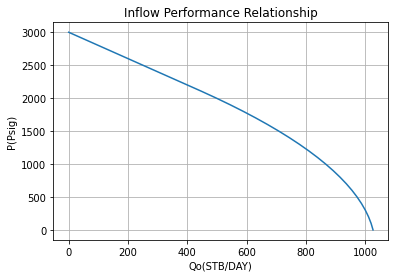

In [4]:
inflow()